In [1]:


import random as rd
import numpy as np
import seaborn as sn
import pandas as pd

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random

In [2]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])


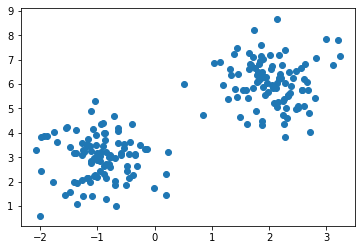

In [3]:
plt.scatter(x=x1,y=x2)
plt.show()

In [4]:
# sns.pairplot(data=dataset)

Algorithmic steps for k-means clustering

Let  X = {x1,x2,x3,……..,xn} be the set of data points and V = {v1,v2,…….,vc} be the set of centers.

1) Randomly select ‘c’ cluster centers.

2) Calculate the distance between each data point and cluster centers.

3) Assign the data point to the cluster center whose distance from the cluster center is minimum of all the cluster centers..

4) Recalculate the new cluster center using: 




where, ‘ci’ represents the number of data points in ith cluster.



5) Recalculate the distance between each data point and new obtained cluster centers.

6) If no data point was reassigned then stop, otherwise repeat from step 3).



### source 

https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm

In [5]:
def kmeans_helper(dataset_list,k,centers=None):
    distances = []
    # FOR EACH DATASERT ITEM AND FOR EACH CENTERS CALCULATE A DISTANCE
    for i in dataset_list:
        distance = []
        for j in centers:
            distance.append(np.sqrt(np.sum((i - j) ** 2)))
        distances.append(distance)
        
    distances = np.array(distances)
    
    #CREATE ARRAY CONTAINING LISTS,DISTANCE, AND WHICH THEY ARE CLOSE TO
    distanced_combined = []
    for i in distances:
        val = i.argmin()
        distanced_combined.append([i.tolist(),i[val],val])
        
    # FOR EACH ARRAY CLOSE TO ONE OF THE CLUSTERS  FIND THE MINIMUM ON AND 
    # ASSIGN AS A CENTER
    new_centers = []
    for i in range(k):
        distanced_combined = np.array(distanced_combined)
        _item = distanced_combined[np.where(distanced_combined[:,2]==i)]
        
        print(_item[:,0])
        
        center_item = 1/k * np.mean(_item[:,0],axis=1)
        new_centers.append(center_item)
        
        
    #RETURN THE NEW CENTER
    return np.array(new_centers)
        
            

In [6]:
def k_means(dataset_list,k):
    # PREOVIDE A RANDOM CENTERS FOR THE HELPER FUNCTION
    random.seed(1)
    random_numbers = random.sample(range(1, len(dataset_list)), k)
    centers = [] 
    for i in random_numbers:
        centers.append(dataset_list[i])
    
    centers = np.array(centers)
    
    
    
    # CALL CENTER FUNCTION UNTIL THE NEW AND THE OLD CENTERS ARE THE SAME
    while True:
        x = kmeans_helper(dataset_list=dataset_list,k=k,centers=centers)
        break
        print('new center',x.tolist())
        if np.array_equal(x,centers):
            break
        else:
            centers = x
    
    return centers
    

In [254]:
data_array = np.array(dataset[['x','y']].values.tolist())
centers = k_means(data_array,2)

[list([1.0755043944980678, 5.046327954457014])
 list([0.8739388513027321, 3.332542071285204])
 list([0.7394774388779259, 4.774265073543745])
 list([2.0114497142517975, 5.502251109626793])
 list([1.5320686531426715, 4.573846814704664])
 list([0.9012485082034453, 4.755921346662673])
 list([1.1612811860714394, 5.012504206070806])
 list([2.2194819044675094, 5.947055031854984])
 list([3.248791407856112, 7.346566033054655])
 list([3.1291307944036215, 7.134272356035444])
 list([2.1579372553593337, 4.260303142567833])
 list([2.4780846738724365, 4.3576989082007085])
 list([0.7417455749518639, 4.798752009486988])
 list([2.5837284006284174, 6.107326889157132])
 list([2.3746165145633964, 5.467084364375016])
 list([2.1469484187019807, 5.8273537229272945])
 list([1.265504317770242, 5.371878591107761])
 list([1.3482235198057948, 3.8249097245029815])
 list([1.508807255225948, 5.5076506859411225])
 list([1.4126455912262823, 5.456982475368664])
 list([0.0, 4.106394839957699])
 list([0.5854979701177401, 

IndexError: tuple index out of range

In [255]:
print('CENTERS ARE',centers.tolist())

CENTERS ARE [[2.8549354626749226, 4.642302439961183], [-0.5054637712502805, 2.282176263193059]]


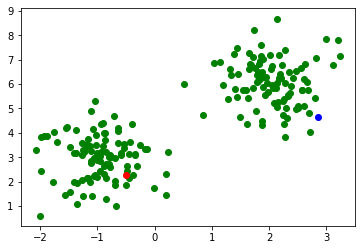

In [256]:
plt.scatter(x=x1,y=x2,c='g')
plt.scatter(x = centers[0][0],y= centers[0][1],c='b')
plt.scatter(x = centers[1][0],y= centers[1][1],c='r')

plt.show()

In [190]:
def closer(center,number):
    distance = []
    for i in center:
        distance.append(np.sqrt(np.sum((i - number) ** 2)))
    
    distance = np.argmin(distance)
    distance = np.where(distance==0, -1, distance)
    return distance
    

In [191]:
data_array = np.array(dataset[['x','y']].values.tolist())
value = np.array(dataset['c'].values.tolist())

In [192]:
a = np.zeros(len(data_array))
for i in range(len(data_array)):
    a[i] = int(closer(centers,data_array[i]))==int(value[i])
    
a

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])